In [1]:
# Import the necessary libraries
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Set the path
dataset='dataset'

train_folder = os.path.join(dataset,"train")
test_folder = os.path.join(dataset,"test")
validation_folder = os.path.join(dataset,"validation")

In [3]:
# Preprocess the Data
target_size = (224, 224)
batch_size = 50

# ImageDataGenerator for training set with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0,1]
    shear_range=0.2,         # Shear intensity
    zoom_range=0.2,          # Zoom range
    rotation_range=20,       # Rotation range
    width_shift_range=0.2,   # Width shift range
    height_shift_range=0.2,  # Height shift range
    horizontal_flip=True,    # Horizontal flip
    vertical_flip=True       # Vertical flip
)

# ImageDataGenerator for validation set (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# ImageDataGenerator for test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['Bean', 'Carrot']  # Specify the classes
)

# Flow validation images in batches using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
    validation_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['Bean', 'Carrot']
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['Bean', 'Carrot']
)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [5]:
# Building a CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Optional dropout for regularization
model.add(Dense(2, activation='softmax'))  # Assuming binary classification, adjust for multiclass

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [6]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
40/40 [==============================] - 11s 214ms/step - loss: 0.3593 - accuracy: 0.9020 - val_loss: 0.0269 - val_accuracy: 0.9975
Epoch 2/10
40/40 [==============================] - 9s 215ms/step - loss: 0.0270 - accuracy: 0.9940 - val_loss: 0.0455 - val_accuracy: 0.9950
Epoch 3/10
40/40 [==============================] - 9s 214ms/step - loss: 0.0082 - accuracy: 0.9970 - val_loss: 0.0113 - val_accuracy: 0.9975
Epoch 4/10
40/40 [==============================] - 9s 218ms/step - loss: 0.0152 - accuracy: 0.9945 - val_loss: 1.5825e-05 - val_accuracy: 1.0000
Epoch 5/10
40/40 [==============================] - 9s 214ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 4.4409e-05 - val_accuracy: 1.0000
Epoch 6/10
40/40 [==============================] - 9s 218ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.5884e-06 - val_accuracy: 1.0000
Epoch 7/10
40/40 [==============================] - 9s 213ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 1.4629e-05 - val_accura

In [7]:
# Evaluate the model on the testing set
accuracy = model.evaluate(test_generator)[1]
print(f"Testing Accuracy: {100*accuracy}")

8/8 [==============================] - 0s 36ms/step - loss: 2.5779e-07 - accuracy: 1.0000
Testing Accuracy: 100.0


In [8]:
classes = ['Bean','Bitter_Gourd','Bottle_Gourd','Brinjal','Broccoli','Cabbage','Capsicum','Carrot','Cauliflower','Cucumber','Papaya','Potato','Pumpkin','Radish','Tomato']

In [9]:
# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes = classes
)

# Flow validation images in batches using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
    validation_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


#### Transfer Learning.

In [10]:
# Create a new model for multi-class classification with the same architecture
num_classes = 15 
multi_class_model = Sequential()

multi_class_model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
multi_class_model.add(MaxPooling2D(pool_size=(2, 2)))

multi_class_model.add(Conv2D(64, (3, 3), activation='relu'))
multi_class_model.add(MaxPooling2D(pool_size=(2, 2)))

multi_class_model.add(Conv2D(128, (3, 3), activation='relu'))
multi_class_model.add(MaxPooling2D(pool_size=(2, 2)))

multi_class_model.add(Flatten())

multi_class_model.add(Dense(128, activation='relu'))
multi_class_model.add(Dropout(0.5))
multi_class_model.add(Dense(num_classes, activation='softmax'))

# Set weights from the previous binary model
for i in range(len(multi_class_model.layers)-1):
    multi_class_model.layers[i].set_weights(model.layers[i].get_weights())

multi_class_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [11]:
# Compile the model
multi_class_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = multi_class_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
300/300 [==============================] - 65s 214ms/step - loss: 2.0175 - accuracy: 0.3339 - val_loss: 1.1739 - val_accuracy: 0.6047
Epoch 2/10
300/300 [==============================] - 64s 213ms/step - loss: 1.2691 - accuracy: 0.5653 - val_loss: 0.7659 - val_accuracy: 0.7533
Epoch 3/10
300/300 [==============================] - 65s 216ms/step - loss: 0.9877 - accuracy: 0.6771 - val_loss: 1.0431 - val_accuracy: 0.7033
Epoch 4/10
300/300 [==============================] - 64s 214ms/step - loss: 0.8681 - accuracy: 0.7107 - val_loss: 0.5148 - val_accuracy: 0.8370
Epoch 5/10
300/300 [==============================] - 64s 212ms/step - loss: 0.7575 - accuracy: 0.7564 - val_loss: 0.4701 - val_accuracy: 0.8493
Epoch 6/10
300/300 [==============================] - 64s 215ms/step - loss: 0.7073 - accuracy: 0.7680 - val_loss: 0.4388 - val_accuracy: 0.8613
Epoch 7/10
300/300 [==============================] - 64s 213ms/step - loss: 0.6424 - accuracy: 0.7897 - val_loss: 0.3124 - val_ac

In [13]:
# Check the accuracy for Test Dataset
accuracy = multi_class_model.evaluate(test_generator)[1]
print(f"Testing Accuracy: {100*accuracy}")

60/60 [==============================] - 2s 38ms/step - loss: 0.2729 - accuracy: 0.9167
Testing Accuracy: 91.66666865348816


In [14]:
class_map = dict([(v, k) for k, v in train_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [4]:
# Create a function to open the camera, capture the image and label what type of image it is.
from tensorflow.keras.preprocessing import image

def classify_camera_feed(camera_index=0, model=None, class_map=None):
    # Open the camera
    camera = cv2.VideoCapture(camera_index)

    if not camera.isOpened():
        print("Error: Could not open camera.")
        exit()

    while True:
        # Capture frame-by-frame
        ret, frame = camera.read()

        if not ret:
            print("Error: Could not read frame.")
            break

        # Resize the frame to the input size
        resized_frame = cv2.resize(frame, (224, 224))

        # Preprocess the frame (assuming it is in BGR format)
        frame_array = image.img_to_array(resized_frame)
        frame_array = np.expand_dims(frame_array, axis=0)
        frame_array /= 255.0  # Normalize pixel values to [0, 1]

        # Make predictions
        predictions = model.predict(frame_array)

        # Get the class label with the highest probability
        predicted_class = np.argmax(predictions)

        # Check the predicted class with the class_map
        predicted_class_name = class_map.get(predicted_class, 'Unknown')

        # Display the frame with the predicted class
        cv2.putText(frame, f"Predicted Class: {predicted_class_name}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Display the resulting frame
        cv2.imshow('Camera Feed', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close the window
    camera.release()
    cv2.destroyAllWindows()

In [16]:
# Call the function to test the multi_class model
classify_camera_feed(model=multi_class_model, class_map=class_map)

#### Transfer Learning using a well established model.

In [17]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

input_size = (224, 224)
batch_size = 50
num_classes = 15

# Create the base pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add a custom top layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the final transfer learning model
imagenet_model = Model(inputs=base_model.input, outputs=x)

imagenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

imagenet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [18]:
# Train the model
history = imagenet_model.fit(train_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
300/300 [==============================] - 66s 214ms/step - loss: 0.1503 - accuracy: 0.9561 - val_loss: 0.0214 - val_accuracy: 0.9927
Epoch 2/5
300/300 [==============================] - 64s 213ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.0111 - val_accuracy: 0.9970
Epoch 3/5
300/300 [==============================] - 64s 214ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.0148 - val_accuracy: 0.9973
Epoch 4/5
300/300 [==============================] - 64s 213ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0118 - val_accuracy: 0.9973
Epoch 5/5
300/300 [==============================] - 64s 212ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0112 - val_accuracy: 0.9967


In [19]:
# Check the accuracy for Test Dataset
accuracy = imagenet_model.evaluate(test_generator)[1]
print(f"Testing Accuracy: {100*accuracy}")

60/60 [==============================] - 2s 37ms/step - loss: 0.0074 - accuracy: 0.9977
Testing Accuracy: 99.76666569709778


In [ ]:
# Call the function with imagenet model
classify_camera_feed(model = imagenet_model,class_map = class_map)

#### The model performs best with the Resnet model. The resnet model was able to correctly classify every vegetable presented before the camera.

In [24]:
# Save the best performing model.
imagenet_model.save('model.h5')

In [2]:
# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('model.h5')

In [7]:
from tensorflow.keras.preprocessing import image
class_map = {0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}

In [ ]:
# Call the function
classify_camera_feed(model = loaded_model,class_map = class_map)

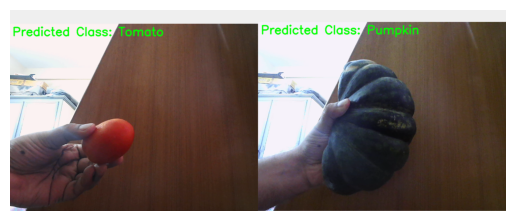

In [10]:
# Show the screenshots of predicted vegetables
import matplotlib.pyplot as plt
image1 = cv2.imread('screenshot1.jpg')
image2 = cv2.imread('screenshot2.jpg')
side_by_side = cv2.hconcat([image1, image2])
plt.imshow(cv2.cvtColor(side_by_side, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [11]:
# Code to read from a folder and predict the classes of images in it.

In [12]:
def predict_and_display_images(model, folder_path):
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"No image files found in the folder: {folder_path}")
        return

    # Load the class map
    class_map = {0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}

    for image_file in image_files:
        # Read the image
        image_path = os.path.join(folder_path, image_file)
        img = cv2.imread(image_path)

        if img is None:
            print(f"Error: Could not read the image {image_path}")
            continue

        # Resize the image
        img = cv2.resize(img, (224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalize pixel values to [0, 1]

        # Make predictions
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions)

        # Get the predicted class name from the class map
        predicted_class_name = class_map.get(predicted_class, 'Unknown')

        # Display the image with the predicted class
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Predicted Class: {predicted_class_name}")
        plt.axis('off')
        plt.show()


1/1 [==============================] - 0s 13ms/step


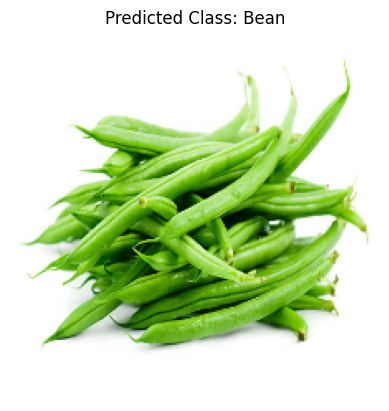

1/1 [==============================] - 0s 12ms/step


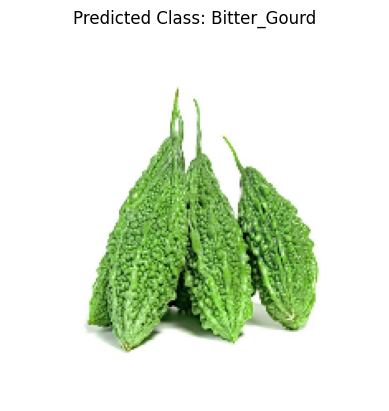

1/1 [==============================] - 0s 12ms/step


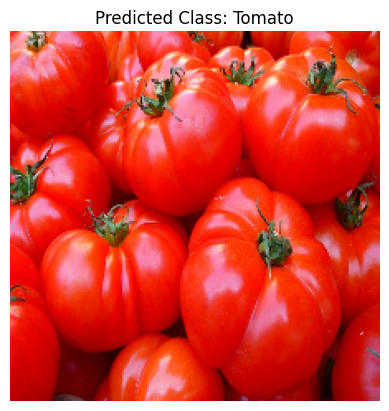

1/1 [==============================] - 0s 12ms/step


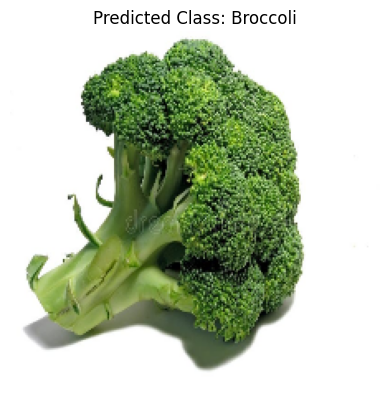

In [15]:
# Call the function.
predict_and_display_images(loaded_model,'camera')